In [ ]:
from os import getcwd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, Adamax
import pandas as pd
from PIL import Image

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/mnist_test.csv")
df.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,4.443144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179318,0.163616,0.052605,0.000600,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674433,5.736359,2.420125,0.060003,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


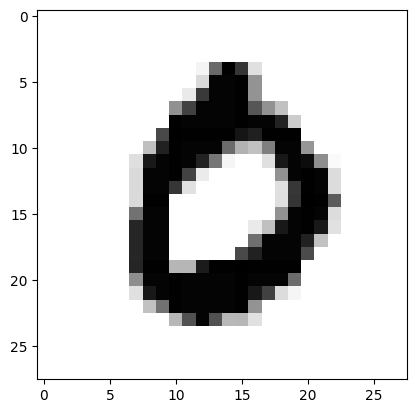

In [ ]:
img = df.iloc[2,:]
imgvw = np.array(img[1:]).reshape(28,-1)
plt.imshow(imgvw, cmap='gray_r')
plt.show()

#Binary Classification

In [ ]:
df_0 = df[df['7'] == 0]
df_1 = df[df['7'] == 1]

df_0.append(df_1, ignore_index=True)
df_01 = pd.concat([df_0, df_1], axis=0, ignore_index=True)
df_01 = df_01.sample(frac=1, random_state=123)
df_01.head()

<ipython-input-6-d5bc99ec6fed>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_0.append(df_1, ignore_index=True)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
2002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_01.drop(axis=1, labels=['7'])
Y = df_01['7']
X.shape, Y.shape

((2115, 784), (2115,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=424)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1797, 784), (318, 784), (1797,), (318,))

In [ ]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='linear')
])
model.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(0.001))

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
57/57 [==============================] - 3s 6ms/step - loss: 0.7118
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 6.7746e-04
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 5.9293e-04
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 2.5465e-04
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 1.5598e-04
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 1.2638e-04
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 1.0329e-04
Epoch 10/50
57/57 [==============================] - 0s 4ms/step - loss: 8.8186e-05
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 7.6416e-05
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 6.6655e-05
Epoch 13/50
5

In [ ]:
yhat_test = tf.nn.sigmoid(model.predict(x_test))
yhat_train = tf.nn.sigmoid(model.predict(x_train))
yhat_test = np.where(yhat_test > 0.5, 1, 0)
yhat_train = np.where(yhat_train > 0.5, 1, 0)

57/57 [==============================] - 0s 2ms/step


In [ ]:
accuracy_score(y_test, yhat_test), accuracy_score(y_train, yhat_train)

(1.0, 1.0)

#Multiclass Classification

In [ ]:
X_mult = df.drop(axis=1, labels=['7'])
Y_mult = df['7']
X_mult.shape, Y_mult.shape

((9999, 784), (9999,))

In [ ]:
x_mult_train, x_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult,Y_mult, test_size=0.3, random_state=424)
x_mult_train.shape, x_mult_test.shape, y_mult_train.shape, y_mult_test.shape

((6999, 784), (3000, 784), (6999,), (3000,))

In [ ]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear')
])
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(0.001))

model.fit(x_mult_train, y_mult_train, epochs=50)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 5.3327
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 1.9440
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 1.7759
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 1.5517
Epoch 5/50
219/219 [==============================] - 1s 2ms/step - loss: 1.3194
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 1.1004
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.9283
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.8410
Epoch 9/50
219/219 [==============================] - 1s 2ms/step - loss: 0.7687
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.6783
Epoch 11/50
219/219 [==============================] - 1s 2ms/step - loss: 0.6498
Epoch 12/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5914
Epoch 13/50
219/219 [====

In [ ]:
def fromProbToLable(y_hat):
  y_hat_lable = np.empty(y_hat.shape[0]).astype('int64')
  for i in range(len(y_hat)):
    y_hat_lable[i] = np.round(np.argmax(y_hat[i]))
  return y_hat_lable

In [ ]:
yhat_mult_test = tf.nn.softmax(model.predict(x_mult_test))
yhat_mult_train = tf.nn.softmax(model.predict(x_mult_train))

yhat_mult_test = fromProbToLable(yhat_mult_test)
yhat_mult_train = fromProbToLable(yhat_mult_train)

219/219 [==============================] - 0s 2ms/step


In [ ]:
#little bit overfit :(
accuracy_score(y_mult_test, yhat_mult_test), accuracy_score(y_mult_train, yhat_mult_train)


(0.884, 0.9335619374196313)